In [1]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
from IPython.display import display
plt.style.use(["science","no-latex", "/afs/ihep.ac.cn/users/l/luoxj/Style/Paper.mplstyle"])
%config InlineBackend.figure_format = 'svg'
#plt.rcParams['figure.dpi'] = 300
#plt.rcParams['savefig.dpi'] = 300
import sys
sys.path.append("/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/")

In [2]:
from LoadMultiFiles import LoadOneFileUproot
from ConcanatePreviousPrediction import GetSelectedDataframe
df_map = GetSelectedDataframe(inf_from_evtType=["evtType", "R", "recE"])

display(df_map)

,evtType,R,recE,TagAP,TagIBDp,TagIBDd,IBDSource,psdVal,TagPSD,TagCCp,TagCCd,CCSource
0,pES,6854.586489,0.195969,0,0,0,-1,4.332481e-03,2,0,0,0
1,N12,15130.035355,58.678581,0,0,0,-1,9.998755e-01,1,1,0,-1
2,AfterPulse,586.030974,0.444959,1,0,0,0,5.603862e-03,2,0,0,0
3,AfterPulse,540.508380,0.287102,1,0,0,0,7.416920e-07,2,0,0,0
4,IBDp,12277.913790,12.297911,0,1,0,-1,9.968648e-01,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18663,pES,14187.729726,0.173486,0,0,0,-1,1.275571e-03,2,0,0,0
18664,IBDp,11950.287108,12.726572,0,1,0,-1,9.985903e-01,1,0,0,0
18665,IBDd,12043.002196,2.300554,0,0,1,18664,9.971751e-01,1,0,0,0
18666,IBDp,15591.648029,17.081907,0,1,0,-1,9.998966e-01,1,0,0,0


[]

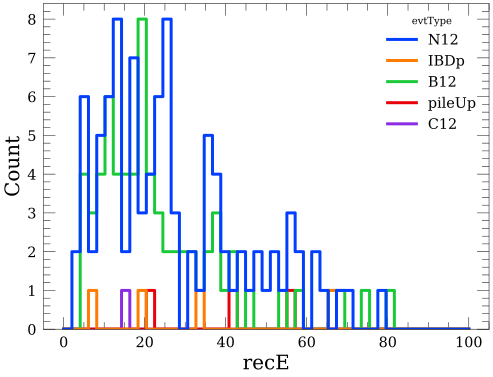

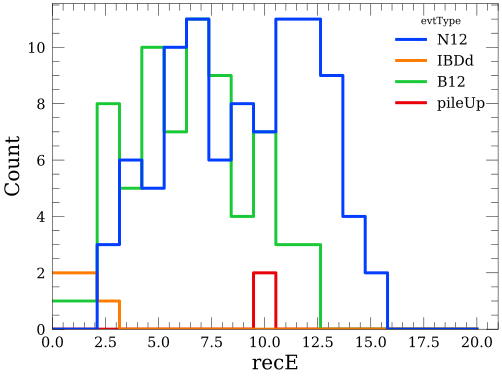

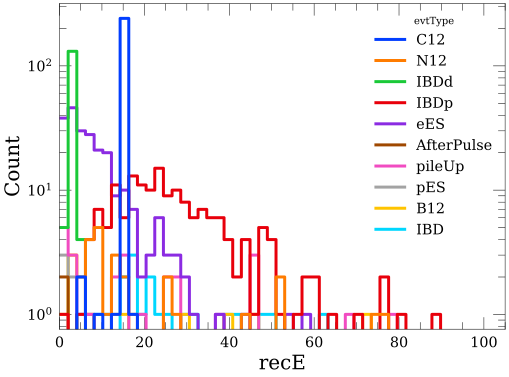

In [3]:
import seaborn as sns
# Previous Cut
FV_cut = 17e3 # mm
index_residue = ( (df_map["TagAP"]==0) & (df_map["TagPSD"]==1) & (df_map["TagIBDp"]==0) &
                  (df_map["TagIBDd"]==0) & (df_map["R"]<FV_cut))
sns.histplot(x="recE", data=df_map[ (index_residue)&(df_map["TagCCp"]==1)&(df_map["TagCCd"]==0) ],  hue="evtType", palette="bright",
             fill=False, element="step",bins=np.linspace(0,100,50))
# plt.semilogy()
# plt.semilogx()

plt.figure()
sns.histplot(x="recE", data=df_map[ (index_residue)&(df_map["TagCCp"]==0)&(df_map["TagCCd"]==1) ],  hue="evtType", palette="bright",
             fill=False, element="step",bins=np.linspace(0,20,20))
plt.xlim(0,)


plt.figure()
sns.histplot(x="recE", data=df_map[ (index_residue)&(df_map["TagCCp"]==0)&(df_map["TagCCd"]==0) ],  hue="evtType", palette="bright",
             fill=False, element="step",bins=np.linspace(0,100,50))
plt.xlim(0,)
plt.semilogy()

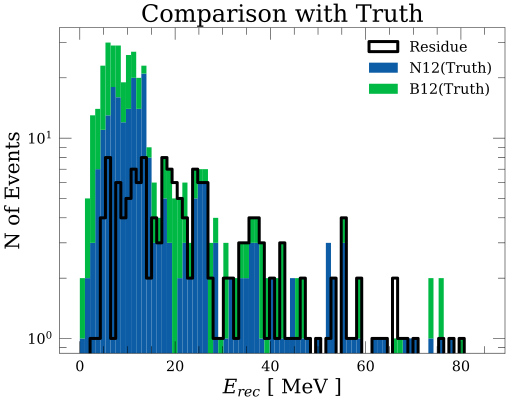

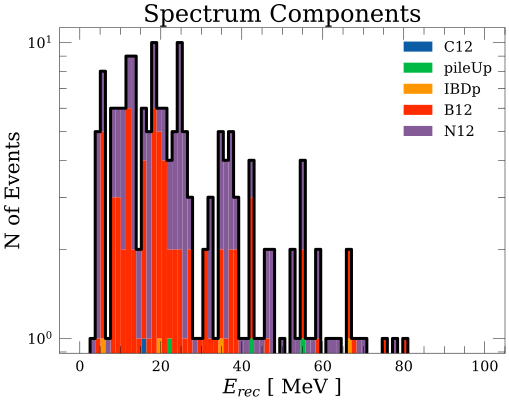

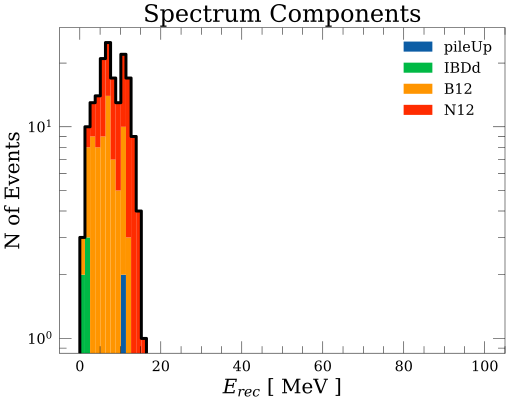

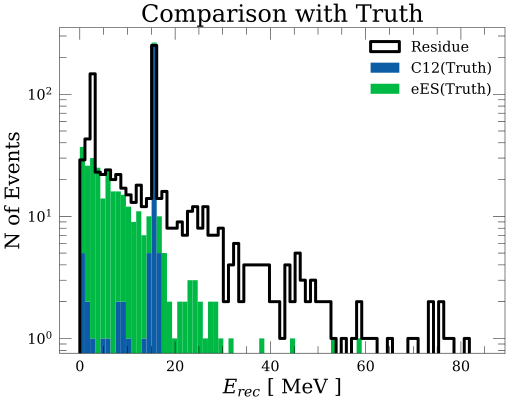

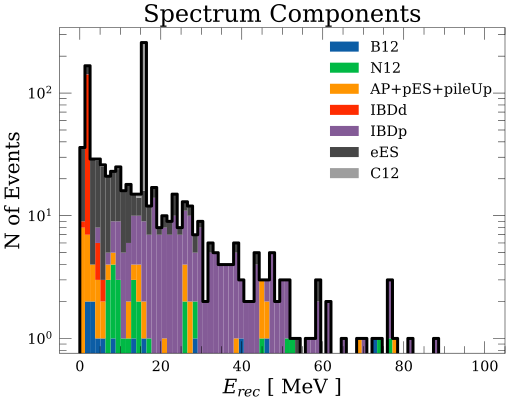

In [11]:
from PlotSpectrum import CompareWithTruthSpectrum,PlotSpectrumComponents
CompareWithTruthSpectrum(df_map[(index_residue)&(df_map["TagCCp"]==1)&(df_map["TagCCd"]==0)],
                         df_map, v_truth_to_plot=["N12", "B12"])
plt.figure()
PlotSpectrumComponents(df_map[(index_residue)&(df_map["TagCCp"]==1)&(df_map["TagCCd"]==0)])

plt.figure()
PlotSpectrumComponents(df_map[(index_residue)&(df_map["TagCCp"]==0)&(df_map["TagCCd"]==1)])

plt.figure()
CompareWithTruthSpectrum(df_map[ (index_residue)&(df_map["TagCCp"]==0)&(df_map["TagCCd"]==0) ],
                         df_map, v_truth_to_plot=["C12", "eES"])

plt.figure()
tag_other = "AP+pES+pileUp"
PlotSpectrumComponents(df_map[ (index_residue)&(df_map["TagCCp"]==0)&(df_map["TagCCd"]==0) ].replace({"AfterPulse":tag_other, "pES":tag_other,"pileUp":tag_other,"IBD":"IBDp"}))



In [5]:
df_map[index_residue].groupby(["TagCCp", "TagCCd","evtType"]).size()

TagCCp  TagCCd  evtType   
0       0       AfterPulse      2
                B12            13
                C12           246
                IBD            20
                IBDd          140
                IBDp          168
                N12            24
                eES           233
                pES             8
                pileUp         26
        1       B12            69
                IBDd            5
                N12            93
                pileUp          2
1       0       B12            68
                C12             1
                IBDp            4
                N12            97
                pileUp          3
dtype: int64